In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

# for modeling 
import sklearn
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

import missingno as msno
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


We want you to set the 'RainToday' variable as the dependent variable and set up a model that predicts whether there will be rain or not. 
This model will be made using;

- 'Desicion Tree',
- 'Random Forest',
- 'LightGBM',
- 'GBM',
- 'XGBoost',
- 'CatBoost' models.

## DATA READING AND EXPLORING

In [3]:
d = pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')
df = d.copy().sample(10000)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
43850,2012-07-26,Wollongong,13.0,18.6,0.0,NaN,NaN,WNW,54.0,NE,...,59.0,63.0,1014.7,1010.2,6.0,NaN,15.2,17.1,No,Yes
132312,2015-07-08,Hobart,0.3,10.0,0.4,1.0,8.5,NNW,35.0,NNW,...,83.0,47.0,1029.1,1026.5,1.0,1.0,1.6,9.8,No,No
131541,2013-05-28,Hobart,3.1,13.8,0.0,0.4,7.6,NNW,30.0,NNW,...,75.0,56.0,1030.4,1027.0,NaN,NaN,5.0,12.2,No,No
720,2010-11-21,Albury,12.7,29.7,0.0,NaN,NaN,N,22.0,E,...,70.0,29.0,1022.1,1019.1,5.0,NaN,20.0,29.5,No,No
96173,2017-01-30,Townsville,24.0,32.5,0.0,9.8,NaN,E,44.0,SSE,...,59.0,64.0,1010.3,1008.1,NaN,8.0,29.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44824,2015-05-25,Wollongong,11.6,19.3,0.0,NaN,NaN,WNW,28.0,NW,...,53.0,56.0,1031.3,1027.9,1.0,4.0,16.5,17.7,No,No
144091,2013-09-26,Uluru,15.0,30.2,0.0,NaN,NaN,S,50.0,ESE,...,30.0,15.0,1019.0,1013.5,NaN,NaN,19.7,27.6,No,No
71216,2011-05-04,Mildura,5.2,19.6,0.0,3.2,9.6,SW,28.0,S,...,81.0,45.0,1024.2,1022.5,1.0,2.0,10.9,19.2,No,No
10800,2014-01-06,CoffsHarbour,21.8,31.2,0.0,7.6,12.5,NNW,31.0,SW,...,44.0,52.0,1007.6,1007.5,2.0,1.0,29.1,27.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 43850 to 88482
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           10000 non-null  object 
 1   Location       10000 non-null  object 
 2   MinTemp        9904 non-null   float64
 3   MaxTemp        9916 non-null   float64
 4   Rainfall       9747 non-null   float64
 5   Evaporation    5698 non-null   float64
 6   Sunshine       5230 non-null   float64
 7   WindGustDir    9301 non-null   object 
 8   WindGustSpeed  9302 non-null   float64
 9   WindDir9am     9273 non-null   object 
 10  WindDir3pm     9701 non-null   object 
 11  WindSpeed9am   9887 non-null   float64
 12  WindSpeed3pm   9778 non-null   float64
 13  Humidity9am    9819 non-null   float64
 14  Humidity3pm    9671 non-null   float64
 15  Pressure9am    9002 non-null   float64
 16  Pressure3pm    9013 non-null   float64
 17  Cloud9am       6168 non-null   float64
 18  Cl

In [5]:
pd.DataFrame({"No. of unique values": list(df.nunique())}, index=df.columns)

,No. of unique values
Date,3018
Location,49
MinTemp,340
MaxTemp,413
Rainfall,274
Evaporation,157
Sunshine,141
WindGustDir,16
WindGustSpeed,58
WindDir9am,16


In [6]:
df.duplicated().sum()

0

In [7]:
y = len(df[df['RainToday'] == 'Yes'])
n = len(df[df['RainToday'] == 'No'])
print(y,n)

2226 7521


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,9904.0,12.094679,6.414538,-7.0,7.4,11.90,16.80,29.7
MaxTemp,9916.0,23.124506,7.153813,-3.0,17.9,22.60,28.20,46.7
Rainfall,9747.0,2.464153,9.083378,0.0,0.0,0.00,0.80,240.0
Evaporation,5698.0,5.449052,4.155077,0.0,2.6,4.80,7.40,70.0
Sunshine,5230.0,7.520880,3.791356,0.0,4.8,8.30,10.50,14.0
WindGustSpeed,9302.0,40.344442,13.744800,6.0,31.0,39.00,48.00,130.0
WindSpeed9am,9887.0,14.104885,8.980311,0.0,7.0,13.00,19.00,74.0
WindSpeed3pm,9778.0,18.898855,8.936040,0.0,13.0,19.00,24.00,65.0
Humidity9am,9819.0,68.886954,18.990709,3.0,57.0,70.00,83.00,100.0
Humidity3pm,9671.0,51.728467,20.839225,3.0,37.0,52.00,66.00,100.0


In [9]:
df.corr() #I can see from here which variables I can put into the model
          #For example, the variables can be removed by looking at the order of importance.

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.733273,0.112518,0.473795,0.072458,0.166162,0.162696,0.167452,-0.223272,0.014731,-0.445623,-0.454904,0.082248,0.032521,0.898145,0.703274
MaxTemp,0.733273,1.000000,-0.071884,0.598520,0.470626,0.053295,0.000031,0.040184,-0.504231,-0.509077,-0.320349,-0.414892,-0.286466,-0.277712,0.890364,0.983902
Rainfall,0.112518,-0.071884,1.000000,-0.064724,-0.227543,0.150753,0.087599,0.050396,0.215877,0.258254,-0.171138,-0.131251,0.185245,0.170022,0.018206,-0.075846
Evaporation,0.473795,0.598520,-0.064724,1.000000,0.359956,0.189228,0.176670,0.111199,-0.500614,-0.385444,-0.272329,-0.294940,-0.188049,-0.176826,0.556804,0.582700
Sunshine,0.072458,0.470626,-0.227543,0.359956,1.000000,-0.012859,0.013501,0.076649,-0.490542,-0.625257,0.040766,-0.011000,-0.669628,-0.702000,0.296273,0.485041
WindGustSpeed,0.166162,0.053295,0.150753,0.189228,-0.012859,1.000000,0.614157,0.696179,-0.205219,-0.023369,-0.458443,-0.411892,0.066125,0.088683,0.133943,0.020316
WindSpeed9am,0.162696,0.000031,0.087599,0.176670,0.013501,0.614157,1.000000,0.526160,-0.253334,-0.018994,-0.234207,-0.179308,0.021206,0.045393,0.116277,-0.007038
WindSpeed3pm,0.167452,0.040184,0.050396,0.111199,0.076649,0.696179,0.526160,1.000000,-0.130355,0.023367,-0.301387,-0.258854,0.047721,0.010544,0.150787,0.018687
Humidity9am,-0.223272,-0.504231,0.215877,-0.500614,-0.490542,-0.205219,-0.253334,-0.130355,1.000000,0.659811,0.133000,0.181835,0.450435,0.357518,-0.470413,-0.496816
Humidity3pm,0.014731,-0.509077,0.258254,-0.385444,-0.625257,-0.023369,-0.018994,0.023367,0.659811,1.000000,-0.032309,0.045975,0.504612,0.531674,-0.221020,-0.558373


## SOME OF VISUALIZATION

<AxesSubplot:>

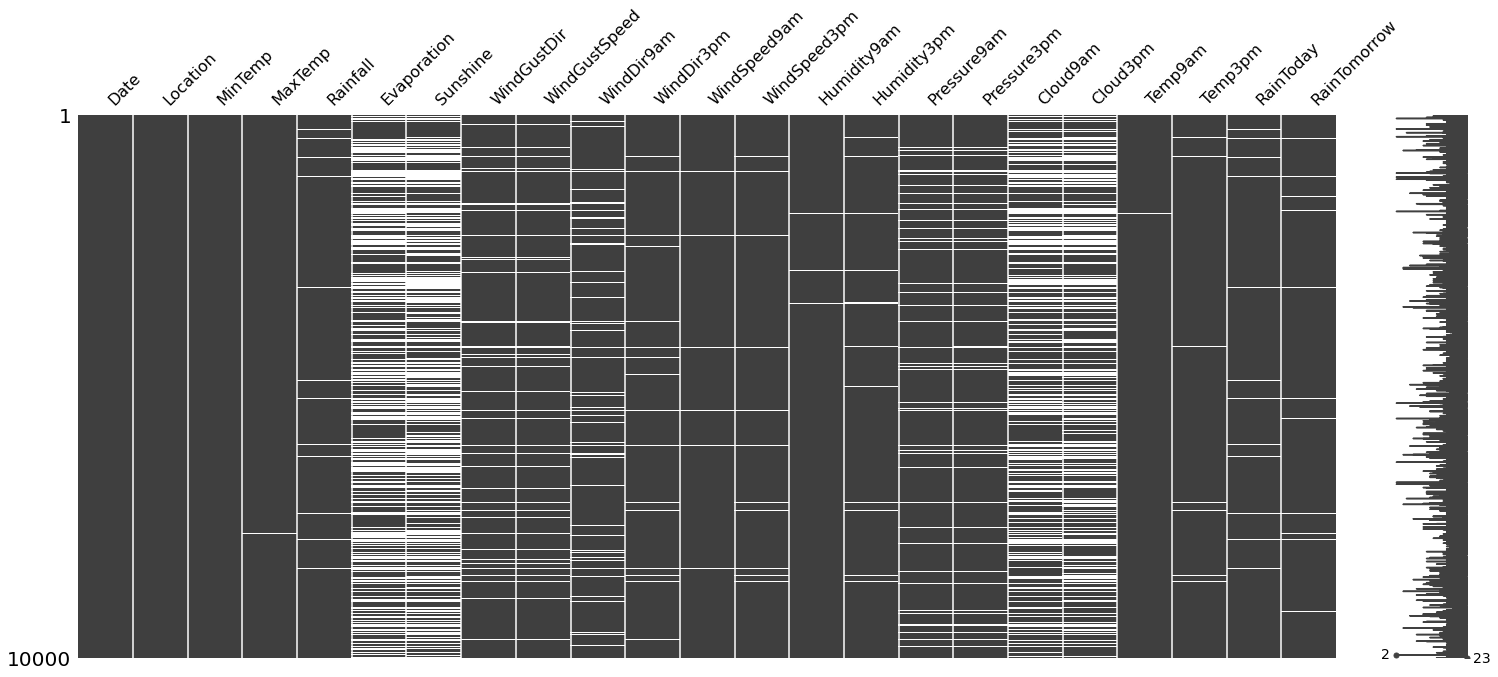

In [10]:
#VISUALIZATION OF NAN  VALUES
msno.matrix(df)

In [11]:
#drop missing values in the RainToday and RainTomorrow
df.dropna(subset=['RainToday', 'RainTomorrow'],axis=0,inplace=True)

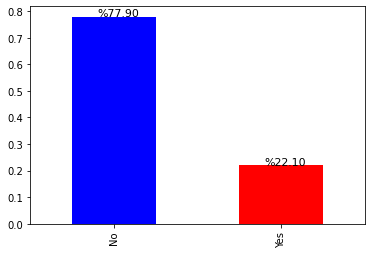

In [12]:
ax = df['RainTomorrow'].value_counts(normalize=True).plot.bar(color=["blue", "red"])
def labels(ax):
    for p in ax.patches:
        ax.annotate(f"%{p.get_height()*100:.2f}", (p.get_x() + 0.15, p.get_height() * 1.005),size=11)
labels(ax)

In [13]:
def summary(df):
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0]) # .shape[0] yazilmaz ise unique olan degerlerin listelerini getirir.
    Nulls = df.apply(lambda x: x.isnull().sum())

    cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
    str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    display(str.sort_values(by='Nulls', ascending=False))
    print('__________Data Types__________\n')
    print(str.Types.value_counts())
summary(df)

,Types,Counts,Uniques,Nulls,Min,Max
Sunshine,float64,5100,142,4546,0.0,14.0
Evaporation,float64,5585,156,4061,0.0,70.0
Cloud3pm,float64,5775,10,3871,0.0,8.0
Cloud9am,float64,6070,11,3576,0.0,9.0
Pressure9am,float64,8746,429,900,986.3,1040.3
Pressure3pm,float64,8752,423,894,982.6,1037.6
WindDir9am,object,8988,17,658,NaN,NaN
WindGustDir,object,9033,17,613,NaN,NaN
WindGustSpeed,float64,9034,59,612,6.0,130.0
Humidity3pm,float64,9392,99,254,3.0,100.0


__________Data Types__________

float64    16
object      7
Name: Types, dtype: int64


In [14]:
#label encoding for univariate variables
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()
df["RainToday_label"] = lbe.fit_transform(df["RainToday"])
df["RainTomorrow_label"] = lbe.fit_transform(df["RainTomorrow"])

In [15]:
# one-hot encoding for variables with more than 2 categories

#drop variables with so many countries for the sake of time and memory consumption
df.drop(['Date','Location','WindDir9am','WindDir3pm','WindGustDir'], axis=1, inplace=True) 

In [16]:
summary(df)

,Types,Counts,Uniques,Nulls,Min,Max
Sunshine,float64,5100,142,4546,0.0,14.0
Evaporation,float64,5585,156,4061,0.0,70.0
Cloud3pm,float64,5775,10,3871,0.0,8.0
Cloud9am,float64,6070,11,3576,0.0,9.0
Pressure9am,float64,8746,429,900,986.3,1040.3
Pressure3pm,float64,8752,423,894,982.6,1037.6
WindGustSpeed,float64,9034,59,612,6.0,130.0
Humidity3pm,float64,9392,99,254,3.0,100.0
Temp3pm,float64,9451,414,195,-4.2,45.2
WindSpeed3pm,float64,9468,37,178,0.0,65.0


__________Data Types__________

float64    16
int64       2
object      2
Name: Types, dtype: int64


In [17]:
# DecisionTreeRegressor

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

#drop unnecessary columns and date columns
df_imputation = df.drop(['RainToday','RainTomorrow'], axis=1) 

#define variables to keep the index and the columns
index = df_imputation.index
columns = df_imputation.columns

#imputation steps
imp_tree = IterativeImputer(random_state=0, estimator=DecisionTreeRegressor())
imp_tree.fit(df_imputation)
df_imputed = imp_tree.transform(df_imputation)

#transform imputed data in array format to dataframe
df_imputed_tree = pd.DataFrame(df_imputed, index=index, columns=columns)

df_imputed_tree.isnull().sum()

MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustSpeed         0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm           0
Cloud9am              0
Cloud3pm              0
Temp9am               0
Temp3pm               0
RainToday_label       0
RainTomorrow_label    0
dtype: int64

In [18]:
df_imputed_tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9646 entries, 43850 to 88482
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MinTemp             9646 non-null   float64
 1   MaxTemp             9646 non-null   float64
 2   Rainfall            9646 non-null   float64
 3   Evaporation         9646 non-null   float64
 4   Sunshine            9646 non-null   float64
 5   WindGustSpeed       9646 non-null   float64
 6   WindSpeed9am        9646 non-null   float64
 7   WindSpeed3pm        9646 non-null   float64
 8   Humidity9am         9646 non-null   float64
 9   Humidity3pm         9646 non-null   float64
 10  Pressure9am         9646 non-null   float64
 11  Pressure3pm         9646 non-null   float64
 12  Cloud9am            9646 non-null   float64
 13  Cloud3pm            9646 non-null   float64
 14  Temp9am             9646 non-null   float64
 15  Temp3pm             9646 non-null   float64
 16  R

## 1-Decision Tree Classifier

In [19]:
df2 = df_imputed_tree.copy()
x_dat = df2.drop(['RainTomorrow_label'],axis=1)
y = df2["RainTomorrow_label"].values

In [20]:
#If there is a outlier values, it must be done before coming here
X=(x_dat-np.min(x_dat))/(np.max(x_dat)-np.min(x_dat)).values

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [22]:
dtc = DecisionTreeClassifier()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

cart_model = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)
y_pred = cart_model.predict(X_test)
y_pred

array([0., 0., 0., ..., 1., 0., 0.])

In [24]:
dtc_score=accuracy_score(y_test,y_pred)
dtc_score

0.7525915687629579

In [25]:
c_dtc=confusion_matrix(y_test,y_pred)
c_dtc

array([[1854,  388],
       [ 328,  324]])

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      2242
         1.0       0.46      0.50      0.48       652

    accuracy                           0.75      2894
   macro avg       0.65      0.66      0.66      2894
weighted avg       0.76      0.75      0.76      2894



## Decision Tree Model tuning

In [27]:
tree_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [28]:
tree1 = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree1, tree_grid, cv = 10, n_jobs = -1, verbose = 2)
tree_cv_model = tree_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 2580 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   53.3s finished


In [29]:
print("Best Parameters: " + str(tree_cv_model.best_params_))

Best Parameters: {'max_depth': 5, 'min_samples_split': 4}


In [30]:
tree1 = DecisionTreeClassifier(max_depth = 5, min_samples_split = 23)
tree_tuned1 = tree1.fit(X_train, y_train)

In [31]:
y_pred = tree_tuned1.predict(X_test)
dtc_finalscore=accuracy_score(y_test, y_pred)
dtc_finalscore

0.8351762266758811

In [32]:
c_dtc2=confusion_matrix(y_test,y_pred)
c_dtc2

array([[2113,  129],
       [ 348,  304]])

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      2242
         1.0       0.70      0.47      0.56       652

    accuracy                           0.84      2894
   macro avg       0.78      0.70      0.73      2894
weighted avg       0.82      0.84      0.82      2894



## 2-Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
y_pred = rf_model.predict(X_test)

In [37]:
rf_score=accuracy_score(y_test,y_pred)
rf_score

0.8410504492052523

In [38]:
c_rf=confusion_matrix(y_test,y_pred)
c_rf

array([[2123,  119],
       [ 341,  311]])

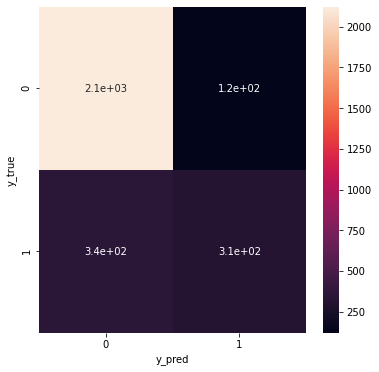

In [39]:
y_true=y_test
y_pred=rf_model.predict(X_test)
cmlr=confusion_matrix(y_true, y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmlr, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      2242
         1.0       0.72      0.48      0.57       652

    accuracy                           0.84      2894
   macro avg       0.79      0.71      0.74      2894
weighted avg       0.83      0.84      0.83      2894



In [83]:
rf_model.predict(X_test)[0:10] # ilk 10 datatestdeki tahminler.

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 1.])

In [84]:
rf_model.predict_proba(X_test)[0:10] #1.si 0 olma 2.si 1 olma olasiligi oranlari.

array([[0.76, 0.24],
       [0.93, 0.07],
       [0.93, 0.07],
       [0.89, 0.11],
       [0.92, 0.08],
       [0.32, 0.68],
       [0.82, 0.18],
       [0.98, 0.02],
       [0.62, 0.38],
       [0.11, 0.89]])

n_estimators= 1 --> Accuracy: 77.67795438838976 %
n_estimators= 2 --> Accuracy: 81.16793365583966 %
n_estimators= 3 --> Accuracy: 80.58051140290256 %
n_estimators= 4 --> Accuracy: 82.17000691085003 %
n_estimators= 5 --> Accuracy: 81.99723565998617 %
n_estimators= 6 --> Accuracy: 82.48099516240498 %
n_estimators= 7 --> Accuracy: 82.27366966136836 %
n_estimators= 8 --> Accuracy: 82.55010366275052 %
n_estimators= 9 --> Accuracy: 82.75742916378715 %
n_estimators= 10 --> Accuracy: 82.51554941257776 %
n_estimators= 11 --> Accuracy: 82.61921216309605 %
n_estimators= 12 --> Accuracy: 82.86109191430546 %
n_estimators= 13 --> Accuracy: 82.89564616447824 %
n_estimators= 14 --> Accuracy: 83.20663441603318 %
n_estimators= 15 --> Accuracy: 83.10297166551486 %
n_estimators= 16 --> Accuracy: 83.31029716655148 %
n_estimators= 17 --> Accuracy: 83.20663441603318 %
n_estimators= 18 --> Accuracy: 83.48306841741534 %
n_estimators= 19 --> Accuracy: 83.20663441603318 %
n_estimators= 20 --> Accuracy: 83.413959

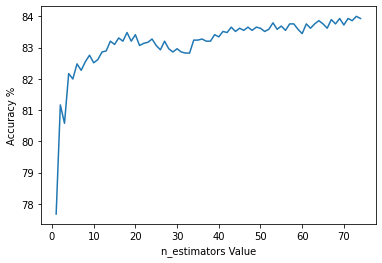

In [85]:
from sklearn.ensemble import RandomForestClassifier 
score_list=[]
for each in range(1,75):
    rf2=RandomForestClassifier(n_estimators=each, random_state=42)
    rf2.fit(X_train, y_train)
    score_list.append(100*rf2.score(X_test, y_test))
    print("n_estimators=", each, "--> Accuracy:", 100*rf2.score(X_test, y_test), "%")

plt.plot([*range(1,75)], score_list)
plt.xlabel("n_estimators Value")
plt.ylabel("Accuracy %")
plt.show()

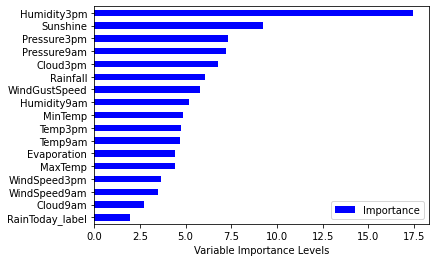

In [86]:
Importance = pd.DataFrame({"Importance": rf_model.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "b")

plt.xlabel("Variable Importance Levels");

In [87]:
y_pred = rf2.predict(X_test)
rf_finalscore=accuracy_score(y_test, y_pred)
rf_finalscore

0.8393227366966137

## 3-LightGBM

In [41]:
from lightgbm import LGBMClassifier

In [43]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [44]:
y_pred = lgbm_model.predict(X_test)

In [45]:
accuracy_score(y_test, y_pred)

0.836558396682792

## Model Tuning of LightGBM

In [46]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [47]:
lgbm = LGBMClassifier(learning_rate = 0.1, 
                       max_depth = 4,
                       subsample = 0.6,
                       n_estimators = 500,
                       min_child_samples = 10)
lgbm_tuned = lgbm.fit(X_train,y_train)

In [48]:
y_pred = lgbm_tuned.predict(X_test)
lgbm_finalscore=accuracy_score(y_test, y_pred)
lgbm_finalscore

0.8379405666897028

In [49]:
c_lgbm=confusion_matrix(y_test,y_pred)
c_lgbm

array([[2085,  157],
       [ 312,  340]])

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      2242
         1.0       0.68      0.52      0.59       652

    accuracy                           0.84      2894
   macro avg       0.78      0.73      0.75      2894
weighted avg       0.83      0.84      0.83      2894



## 4-Gradient Boosting Classifier

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [53]:
y_pred = gbm_model.predict(X_test)

In [54]:
accuracy_score(y_test, y_pred)

0.8407049067035245

## Model Tuning of GBM

In [55]:
gbm = GradientBoostingClassifier(learning_rate = 0.05, 
                                 max_depth = 10,
                                min_samples_split = 10,
                                n_estimators = 100)

In [56]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [57]:
y_pred = gbm_tuned.predict(X_test)
gbm_finalscore=accuracy_score(y_test,y_pred)
gbm_finalscore

0.8355217691776089

In [58]:
c_gbm=confusion_matrix(y_test,y_pred)
c_gbm

array([[2094,  148],
       [ 328,  324]])

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90      2242
         1.0       0.69      0.50      0.58       652

    accuracy                           0.84      2894
   macro avg       0.78      0.72      0.74      2894
weighted avg       0.82      0.84      0.83      2894



## 5-XGBOOST

In [60]:
!pip install xgboost

In [61]:
from xgboost import XGBClassifier

In [62]:
xgb_model = XGBClassifier().fit(X_train, y_train)

[09:49:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [63]:
y_pred = xgb_model.predict(X_test)

In [64]:
accuracy_score(y_test, y_pred)

0.8358673116793366

## Model Tuning of XGBoost

In [65]:
xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 6,
                    n_estimators = 100,
                    subsample = 0.8)
xgb_tuned =  xgb.fit(X_train,y_train)
y_pred = xgb_tuned.predict(X_test)
XGBoost_finalscore=accuracy_score(y_test, y_pred)
XGBoost_finalscore

[09:49:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8393227366966137

In [66]:
c_xgb=confusion_matrix(y_test,y_pred)
c_xgb

array([[2123,  119],
       [ 346,  306]])

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      2242
         1.0       0.72      0.47      0.57       652

    accuracy                           0.84      2894
   macro avg       0.79      0.71      0.73      2894
weighted avg       0.83      0.84      0.83      2894



## 6-Catboost

In [73]:
!pip install catboost

In [74]:
from catboost import CatBoostClassifier, Pool

In [75]:
cat = CatBoostClassifier()

In [76]:
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)

Learning rate set to 0.023286
0:	learn: 0.6744388	total: 60.2ms	remaining: 1m
1:	learn: 0.6579584	total: 64.8ms	remaining: 32.3s
2:	learn: 0.6411255	total: 69.3ms	remaining: 23s
3:	learn: 0.6254212	total: 73.7ms	remaining: 18.4s
4:	learn: 0.6110473	total: 78ms	remaining: 15.5s
5:	learn: 0.5982778	total: 82.3ms	remaining: 13.6s
6:	learn: 0.5855043	total: 86.7ms	remaining: 12.3s
7:	learn: 0.5749856	total: 91ms	remaining: 11.3s
8:	learn: 0.5629884	total: 95.4ms	remaining: 10.5s
9:	learn: 0.5524510	total: 99.7ms	remaining: 9.87s
10:	learn: 0.5419104	total: 104ms	remaining: 9.35s
11:	learn: 0.5317868	total: 108ms	remaining: 8.92s
12:	learn: 0.5227142	total: 113ms	remaining: 8.56s
13:	learn: 0.5143659	total: 117ms	remaining: 8.25s
14:	learn: 0.5061232	total: 121ms	remaining: 7.98s
15:	learn: 0.4979963	total: 126ms	remaining: 7.75s
16:	learn: 0.4900957	total: 130ms	remaining: 7.54s
17:	learn: 0.4825981	total: 135ms	remaining: 7.35s
18:	learn: 0.4752994	total: 139ms	remaining: 7.19s
19:	learn:

In [77]:
cat_finalscore = accuracy_score(y_test, y_pred)
cat_finalscore

0.8458880442294402

In [78]:
c_cat=confusion_matrix(y_test,y_pred)
c_cat

array([[2112,  130],
       [ 316,  336]])

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      2242
         1.0       0.72      0.52      0.60       652

    accuracy                           0.85      2894
   macro avg       0.80      0.73      0.75      2894
weighted avg       0.84      0.85      0.84      2894



In [80]:
print(dtc_finalscore,rf_finalscore,lgbm_finalscore, gbm_finalscore, XGBoost_finalscore, cat_finalscore)

0.8351762266758811 0.8393227366966137 0.8379405666897028 0.8355217691776089 0.8393227366966137 0.8458880442294402


### ----> Best Model is CatBOOST <----

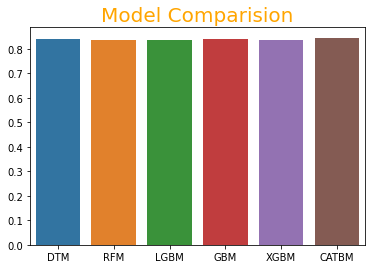

In [81]:
idx = ["DTM","RFM","LGBM", "GBM", "XGBM", "CATBM"]
regressions = [rf_finalscore,dtc_finalscore, gbm_finalscore, XGBoost_finalscore, lgbm_finalscore,cat_finalscore,]

plt.figure(figsize=(6,4))
sns.barplot(x=idx,y=regressions)
plt.xticks()
plt.title('Model Comparision',color = 'orange',fontsize=20);